# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
X

(97, 2)


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

Text(0, 0.5, 'Bénéfice x1000')

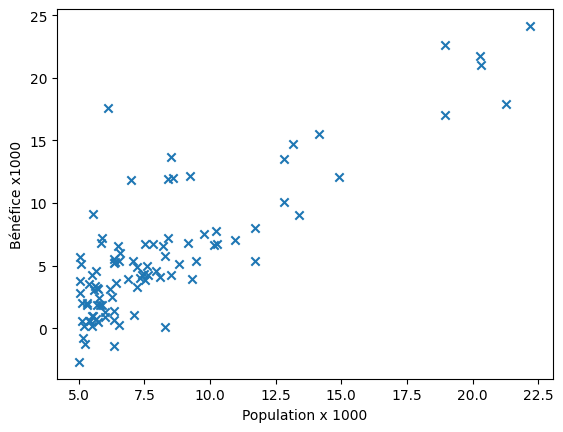

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:
import time

def computeCostNonVect(X, y, theta):
    start_time = time.time()
    cost = 0
    predictions = X @ theta
    # calculer le coût sans vectorisation, 
    for x,y1 in zip(predictions,y):
        cost += (x - y1)**2
    cost = cost/(2*len(y))
    # afficher le temps de traitement
    print("temps d'execution : " ,(time.time() - start_time))
    return cost
    
    

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [6]:
import time
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    # calculer le coût avec vectorisation, 
    start_time = time.time()
    predictions = X @ theta # produit matriciel
    y = y.reshape(-1, 1)
    cost = np.sum((predictions - y)**2)
    cost = cost/(2*len(y))
    # afficher le temps de traitement
    # print("temps d'execution : " ,(time.time() - start_time))
    return cost

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
import numpy as np

def gradientDescent(X, y, theta, alpha, iterations):
    costs = []  # Liste pour stocker le coût à chaque itération
    m = len(y)  # Nombre d'exemples

    for i in range(iterations):
        elt = []  
        elt.append(theta[0,0])
        elt.append(theta[1,0])

        # Calcul des prédictions
        predictions = X @ theta  # Produit matriciel (X * theta)
        errors = predictions - y.reshape(-1, 1)  # Erreur entre les prédictions et y
        # Calcul du coût
        cost = np.sum(errors**2) / (2 * m)  # Fonction de coût J(theta)
        elt.append(cost)
        costs.append(elt)

        # Calcul des gradients
        grad0 = np.sum(errors) / m  # Gradient par rapport à theta0
        grad1 = np.sum(errors * X[:, 1:]) / m  # Gradient par rapport à theta1

        # Mise à jour des paramètres
        theta[0,0] = theta[0,0] - alpha * grad0
        theta[1,0] = theta[1,0] - alpha * grad1

    return theta, costs

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [8]:
theta = np.zeros((2, 1))
print(theta)

[[0.]
 [0.]]


Calculer le cout initial

In [9]:
initialCost=computeCostNonVect(X, y, theta)
print("Calcule du coup sans vectorisation :",initialCost)

temps d'execution :  0.0014011859893798828
Calcule du coup sans vectorisation : [32.07273388]


Calculer le cout initial avec vectorisation (numpy)

In [10]:
initialCost=computeCost(X, y, theta)
print("Calcule du coup avec vectorisation :",initialCost)

Calcule du coup avec vectorisation : 32.072733877455676


Appel des la fonction de calcul du gradient

In [11]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta, costs = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Traçage de la ligne de régression sur les données

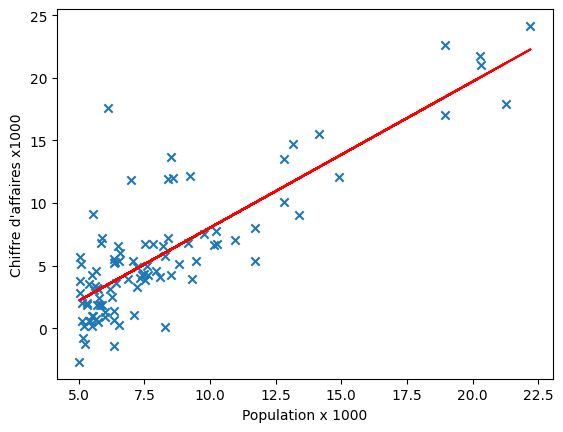

In [12]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1:],y_pred, c='red')
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de $\theta_0$ et $\theta_1$

Traçage du coût en fonction du nombre d'itérations

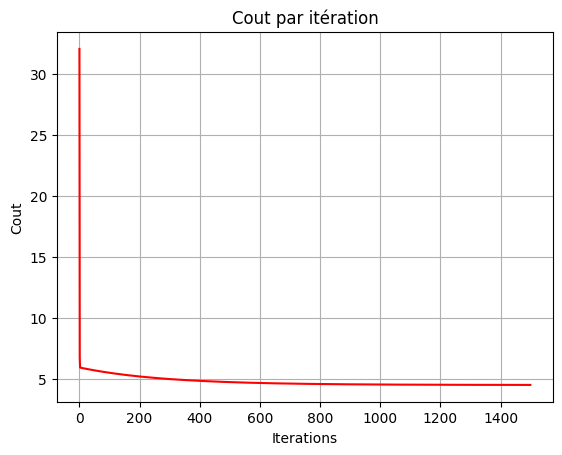

In [13]:

costs = np.array(costs)
plt.plot(costs[:,2:], c='red')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cout')
plt.title('Cout par itération')
plt.show()


Prédire des valeurs de y

In [14]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.45197679])

In [15]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.53424501])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [16]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape

(47, 3)

In [17]:
X=np.concatenate([np.ones((dataMulti.shape[0], 1)), dataMulti[:, 0:2]], axis=1)
print (X.shape)
y = dataMulti[:, 2]
X[0]

(47, 3)


array([1.000e+00, 2.104e+03, 3.000e+00])

Text(0, 0.5, 'Price')

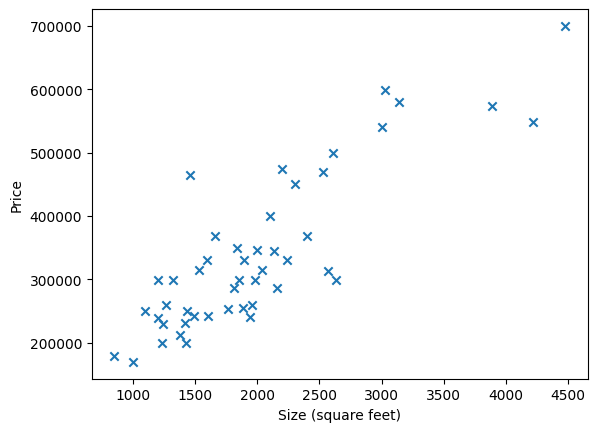

In [18]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Size (square feet)')
plt.ylabel('Price')

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [106]:
# d'abord créer X et y¨
X= dataMulti[:, 0:2]
print (X[0])
y = dataMulti[:, 2]



[2104.    3.]


In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire

def gradientDescent2(X, y, theta, alpha, iterations):
    costs = []  # Liste pour stocker le coût à chaque itération
    m = len(y)  # Nombre d'exemples
    

    for i in range(iterations):
        elt = []  
        elt.append(theta)

        # Calcul des prédictions
        predictions = X @ theta  # Produit matriciel (X * theta)
        errors = predictions - y.reshape(-1, 1)  # Erreur entre les prédictions et y
        # Calcul du coût
        cost = np.sum(errors**2) / (2 * m)  # Fonction de coût J(theta)
        costs.append(cost)

        # Calcul des gradients
        gradients = (1/m) * X.T @ errors 

        # Mise à jour des paramètres
        theta = theta - alpha * gradients
    return theta, costs, elt

Normalisation des données:
$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [92]:
def featureNormalization(X):
    Xscaled = X /  np.max(X, axis=0)
    Xmin = np.min(Xscaled, axis=0)
    Xmax = np.max(Xscaled, axis=0)
    Xmean = np.mean(Xscaled, axis=0)

    Xnormalized = (Xscaled - Xmean) / Xmax - Xmin

    return Xnormalized

Appliquer la descente du gradient à plusieurs variables

Optimized coefficients (theta): [[377261.30434006]
 [175103.21482241]
 [ 34006.92357114]]
[6.55915857e+10 6.43821530e+10 6.31985737e+10 ... 4.70391149e+09
 4.70217188e+09 4.70043355e+09]


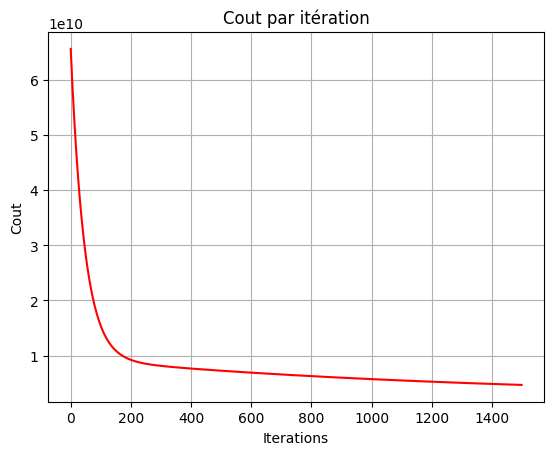

In [115]:
X_normalized = featureNormalization(X)
X_normalized = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]


theta_initial = np.zeros((X_normalized.shape[1], 1))

alpha = 0.01
iterations= 1500
theta_optimal, costs = gradientDescent2(X_normalized, y, theta_initial, alpha, iterations)

print("Optimized coefficients (theta):", theta_optimal)

costs = np.array(costs)
print(costs)
plt.plot(costs[:], c='red')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cout')
plt.title('Cout par itération')
plt.show()

y_pred=np.matmul(X,theta)

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage